In [1]:
import pandas as pd 
import numpy as np
from rdkit import Chem
import datamol as dm
import matplotlib.pyplot as plt
from tqdm import tqdm

## Exptracting the SMART representation of functional gorups

The FunctionalGroups.txt file downlaoded from this [link](https://raw.githubusercontent.com/rdkit/rdkit/master/Data/FunctionalGroups.txt)

In [3]:
file = open('../FunctionalGroups/FunctionalGroups.txt', 'r')
rows= []
for i in file:
    if i.startswith('//') or i.startswith('\n'):
        continue
    else:
        row = i[:-1].split(sep='\t')
        rows.append(row)
        
data = []
for i in rows:
    data.append([i[0], i[1].replace(' ', ''), i[-1]])
        

pattern_data = pd.DataFrame(data, columns=['functional group', 'smart', 'name'])

pattern_data.head()


,functional group,smart,name
0,-NC(=O)CH3,*-[N;D2]-[C;D3](=O)-[C;D1;H3],methyl amide
1,-C(=O)O,*-C(=O)[O;D1],carboxylic acids
2,-C(=O)OMe,*-C(=O)[O;D2]-[C;D1;H3],carbonyl methyl ester
3,-C(=O)H,*-C(=O)-[C;D1],terminal aldehyde
4,-C(=O)N,*-C(=O)-[N;D1],amide


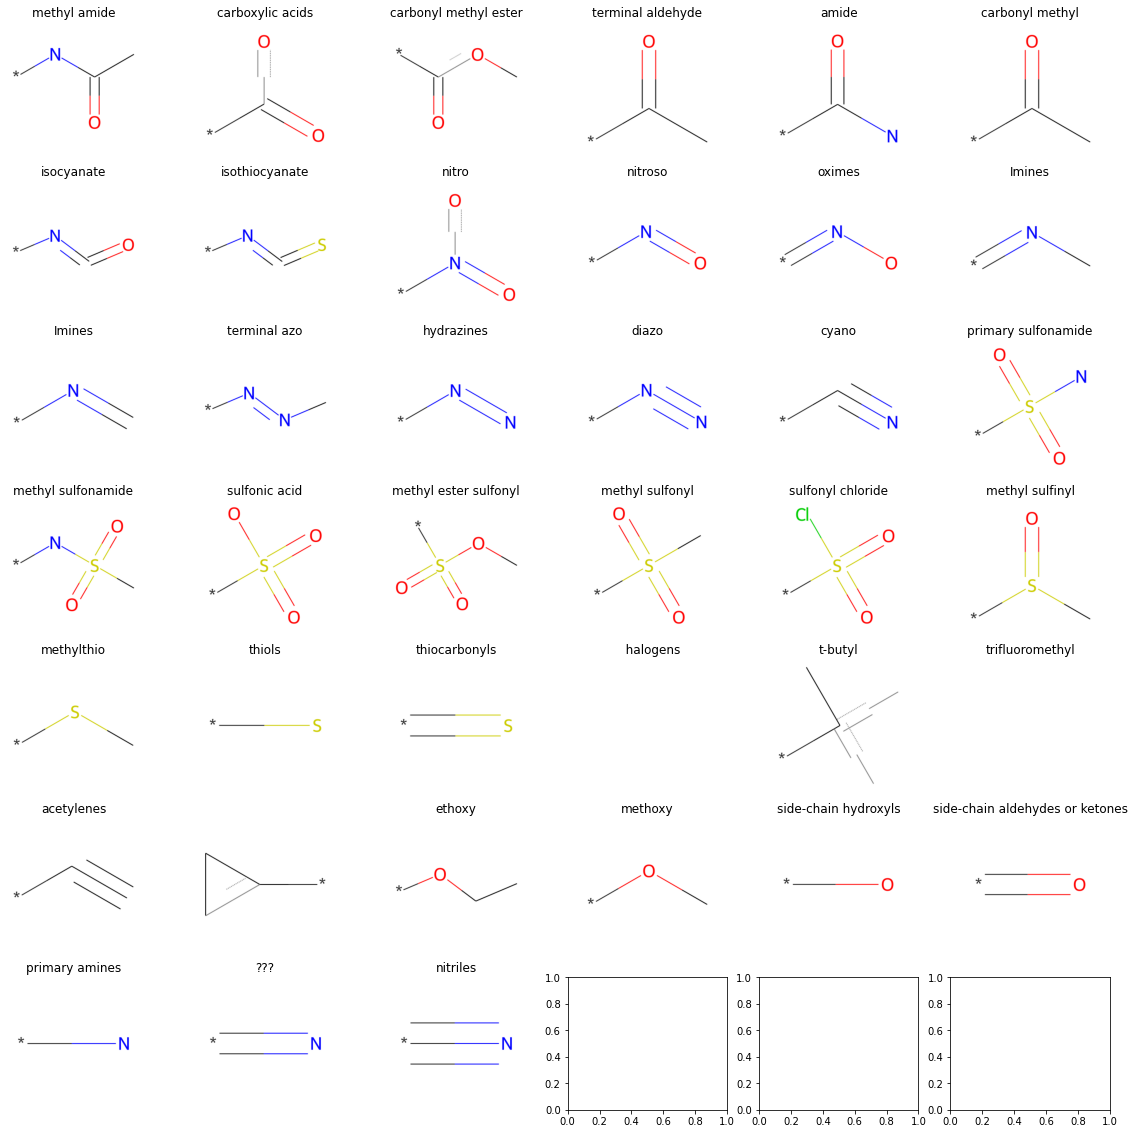

In [72]:
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(20,20))

for i in range(len(pattern_data)):
    mol = Chem.MolFromSmarts(pattern_data.iloc[i,1])
    im = Chem.Draw.MolToImage(mol)
    axes[i // 6][i%6].axis('off')
    axes[i // 6][i%6].imshow(im, )
    axes[i // 6][i%6].set_title(pattern_data.iloc[i][2])


In [45]:
from ogb.lsc import PCQM4Mv2Dataset
dataset = PCQM4Mv2Dataset(root = 'dataset/', only_smiles = True)

Downloaded 0.06 GB: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:02<00:00, 23.32it/s]


Extracting dataset/pcqm4m-v2.zip


## Example

In [82]:
def plot_smile(smile):
    mol = Chem.MolFromSmarts(smile)
    im = Chem.Draw.MolToImage(mol)
    plt.imshow(im)
    plt.show()
    
    
def get_substructure(mol_smile, pattern_smart):
        mol = Chem.MolFromSmiles(mol_smile)

        pattern = Chem.MolFromSmarts(pattern_smart)
        if mol.GetSubstructMatches(pattern) != ():
            pattern = Chem.MolFromSmarts(pattern_smart[2:])
            submol=Chem.ReplaceCore(mol,pattern)
            submol=dm.remove_dummies(submol,) 
            try:
                Chem.SanitizeMol(submol)
                substructure = Chem.MolToSmiles(submol)
            except:
                substructure = (np.NaN)
        else:
            substructure= np.NaN
        return substructure



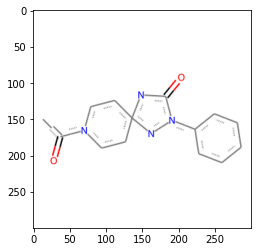

In [83]:
plot_smile('CC(=O)N1CCC2(CC1)NC(=O)N(c1ccccc1)N2')

In [86]:
without_terminal_aldehyde = get_substructure(mol_smile='CC(=O)N1CCC2(CC1)NC(=O)N(c1ccccc1)N2', pattern_smart="*-C(=O)-[C;D1]")

[18:44:57] WARNING: not removing hydrogen atom without neighbors


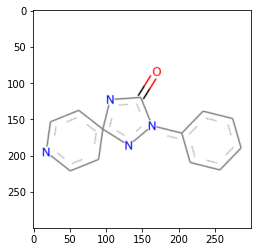

In [87]:
plot_smile(without_terminal_aldehyde)